# Recommendation system

1. Read and explore the given dataset. ( Rename column/add headers, plot histograms,
find data characteristics)
2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the
users only who has given 50 or more number of ratings )
3. Build Popularity Recommender model.
4. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)
5. Build Collaborative Filtering model.
6. Evaluate the above model. ( Once the model is trained on the training data, it can be
used to compute the error (like RMSE) on predictions made on the test data.) You can
also use a different method to evaluate the models.
7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to
each user based on his/her habits, we will recommend 5 new products.
8. Summarise your insights.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
%cd C:\Users\amol.kumar\Desktop

C:\Users\amol.kumar\Desktop


In [3]:
Col_names=['user_id','product_id','rating','timestamp']

In [4]:
df_rating=pd.read_csv('ratings_Electronics_1.csv',names=Col_names)

In [5]:
df_rating.shape

(7824482, 4)

In [6]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
user_id       object
product_id    object
rating        float64
timestamp     int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000002BC6CF4710>]],
      dtype=object)

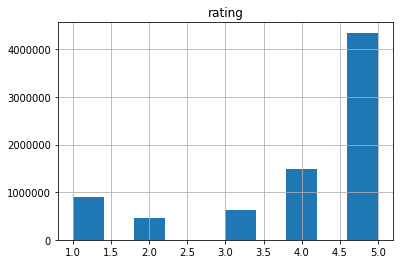

In [7]:
df_rating.hist(column='rating')

In [8]:
df_rating.head()

,user_id,product_id,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


# Dropping Timestamp from Analysis

In [9]:
df_rating=df_rating.drop('timestamp',axis=1)

In [10]:
#taking subset of data

In [11]:
df_count=pd.DataFrame(df_rating.groupby('user_id')['rating'].count()) 

In [12]:
df_count=df_count[df_count['rating']>=50]

In [13]:
df_count=df_count.rename(columns={"user_id":"user_id","rating":"rating_count"})

In [14]:
df_count.head()

,rating_count
user_id,
A100UD67AHFODS,116
A100WO06OQR8BQ,132
A105S56ODHGJEK,68
A105TOJ6LTVMBG,71
A10AFVU66A79Y1,65


In [15]:
df_rating=pd.merge(df_rating,df_count,left_on='user_id',right_on='user_id',how='inner')

In [16]:
df_rating.head()

,user_id,product_id,rating,rating_count
0,A3BY5KCNQZXV5U,0594451647,5.0,50
1,A3BY5KCNQZXV5U,B00000JD4V,4.0,50
2,A3BY5KCNQZXV5U,B000063574,5.0,50
3,A3BY5KCNQZXV5U,B0000CDJP8,5.0,50
4,A3BY5KCNQZXV5U,B0007Y794O,5.0,50


In [17]:
df_rating.shape

(125871, 4)

In [18]:
df_rating['product_id'].nunique()

48190

In [19]:
df_rating['user_id'].nunique()

1540

# Popularity Recommender model

In [20]:
#In popularity model we don't need user ID as Product Id and Rating will decide which product to recommend

In [21]:
#calculating mean of rating for each Product

In [22]:
ratings_mean_count = pd.DataFrame(df_rating.groupby('product_id')['rating'].mean()) 

In [23]:
#it is advisble to find the number of rating to be consider while building popularity based model.

In [24]:
ratings_mean_count['rating_counts'] = pd.DataFrame(df_rating.groupby('product_id')['rating'].count())  

In [25]:
ratings_mean_count.head()

,rating,rating_counts
product_id,,
0594451647,5.000000,1
0594481813,3.000000,1
0970407998,2.500000,2
0972683275,4.750000,4
1400501466,3.333333,6


In [26]:
# we can apply filter on rating count ie let say we can apply minimum rating count as 50

In [27]:
ratings_mean_count=ratings_mean_count[ratings_mean_count['rating_counts']>=50]

In [28]:
ratings_mean_count.head()

,rating,rating_counts
product_id,,
B00004ZCJE,4.250000,72
B00007E7JU,4.416667,60
B0002L5R78,4.611940,67
B000BQ7GW8,4.777778,54
B000HPV3RW,4.803922,51


In [29]:
# Here are the list of 10 product which we can recommend through popularity recommender model

In [30]:
ratings_mean_count.sort_values(by='rating',ascending=False).head(10)

,rating,rating_counts
product_id,,
B001TH7GUU,4.871795,78
B003ES5ZUU,4.864130,184
B0019EHU8G,4.855556,90
B006W8U2MU,4.824561,57
B000QUUFRW,4.809524,84
B000HPV3RW,4.803922,51
B001TH7GSW,4.803279,61
B000BQ7GW8,4.777778,54
B000N99BBC,4.772455,167


# Collaborative Filtering

In [31]:
df_rating.head()

,user_id,product_id,rating,rating_count
0,A3BY5KCNQZXV5U,0594451647,5.0,50
1,A3BY5KCNQZXV5U,B00000JD4V,4.0,50
2,A3BY5KCNQZXV5U,B000063574,5.0,50
3,A3BY5KCNQZXV5U,B0000CDJP8,5.0,50
4,A3BY5KCNQZXV5U,B0007Y794O,5.0,50


In [32]:
df_rating=df_rating.drop('rating_count',axis=1)

In [34]:
df_rating=df_rating.iloc[0:12500,:]# as i am facing memory issue so i am taking 10% of dataset 

In [35]:
from surprise import accuracy
from surprise.model_selection import train_test_split

In [36]:
from surprise import Reader, Dataset
reader = Reader()
data = Dataset.load_from_df(df_rating[['user_id', 'product_id', 'rating']], reader)


In [37]:
trainset, testset = train_test_split(data, test_size=.30)

# SVD

In [38]:
from surprise import SVD

In [39]:
algo = SVD()
algo.fit(trainset)

In [40]:
testset = trainset.build_anti_testset()

In [41]:
predictions = algo.test(testset)

In [50]:
predictions

[Prediction(uid='A3TAS1AG6FMBQW', iid='B0019EHU8G', r_ui=4.274171428571429, est=5, details={'was_impossible': False}),
 Prediction(uid='A3TAS1AG6FMBQW', iid='B000PDR230', r_ui=4.274171428571429, est=4.665486885381422, details={'was_impossible': False}),
 Prediction(uid='A3TAS1AG6FMBQW', iid='B00006HOAS', r_ui=4.274171428571429, est=4.679767688888202, details={'was_impossible': False}),
 Prediction(uid='A3TAS1AG6FMBQW', iid='B005GSNLBQ', r_ui=4.274171428571429, est=4.744870887935145, details={'was_impossible': False}),
 Prediction(uid='A3TAS1AG6FMBQW', iid='B00IF4OF7W', r_ui=4.274171428571429, est=4.2026081832623845, details={'was_impossible': False}),
 Prediction(uid='A3TAS1AG6FMBQW', iid='B004BDORCO', r_ui=4.274171428571429, est=4.742265617499102, details={'was_impossible': False}),
 Prediction(uid='A3TAS1AG6FMBQW', iid='B00608WXGA', r_ui=4.274171428571429, est=4.789497051120481, details={'was_impossible': False}),
 Prediction(uid='A3TAS1AG6FMBQW', iid='B0006VSHE4', r_ui=4.27417142857

In [42]:
print("SVD Model : Test Set")
accuracy.rmse(predictions, verbose=True)

SVD Model : Test Set
RMSE: 0.3943


0.3942648486887371

In [56]:
import collections

In [59]:
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = collections.defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [61]:
get_top_n(predictions)

defaultdict(list,
            {'A3TAS1AG6FMBQW': [('B0019EHU8G', 5),
              ('B002WE4HE2', 5),
              ('B004GK0GKO', 5),
              ('B00000J1SC', 5),
              ('B00006ICIW', 5)],
             'ADLVFFE4VBT8': [('B003QHXZM4', 4.970304372316411),
              ('B0028N6XDA', 4.918802889687357),
              ('B001U612R8', 4.872634769935786),
              ('B0014IUWU0', 4.853425255027241),
              ('B00CTY84KI', 4.845392996040361)],
             'AWPODHOB4GFWL': [('B000HPV3RW', 5),
              ('B00005NPWK', 5),
              ('B004AFFZNI', 5),
              ('B00000J1EQ', 4.954106741178038),
              ('B001O4EPHA', 4.942145881125797)],
             'A3QQGPI3CTV9SX': [('B0018P7WZ2', 5),
              ('B009NHWVIA', 5),
              ('B00000JCTD', 5),
              ('B0011U65F2', 5),
              ('B00006B7HB', 5)],
             'A2HXEJXEQQTM1D': [('B006FLENJC', 4.964957276042553),
              ('B003ES5ZUU', 4.950091234360733),
              ('B00B2